In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load Spotify Dateset:

In [2]:
df = pd.read_csv('Data\data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# Remove unnecessary columns:

In [3]:
# remove id and release date columns:
df = df.drop(columns=['id','release_date'])
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


##  Define numerical & categorical columns

In [4]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

We have 2 categorical features : ['artists', 'name']


## Data Transformation:

In [5]:
num_features = df.select_dtypes(exclude="object").columns
#cat_features = df.select_dtypes(include="object").columns

In [6]:
numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        #("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [7]:
X = preprocessor.fit_transform(df)
X.shape

(170653, 15)

## kmeans model:

In [8]:
model = KMeans(n_clusters=10, verbose=False)
model.fit(X)
cluster_labels = model.predict(X)
df['cluster_label'] = cluster_labels

c:\Users\pc lenovo\.conda\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pc lenovo\.conda\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [9]:
df.shape

(170653, 18)

## Visualizing the Clusters with PCA:

In [10]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = df['name']
projection['cluster'] = df['cluster_label']


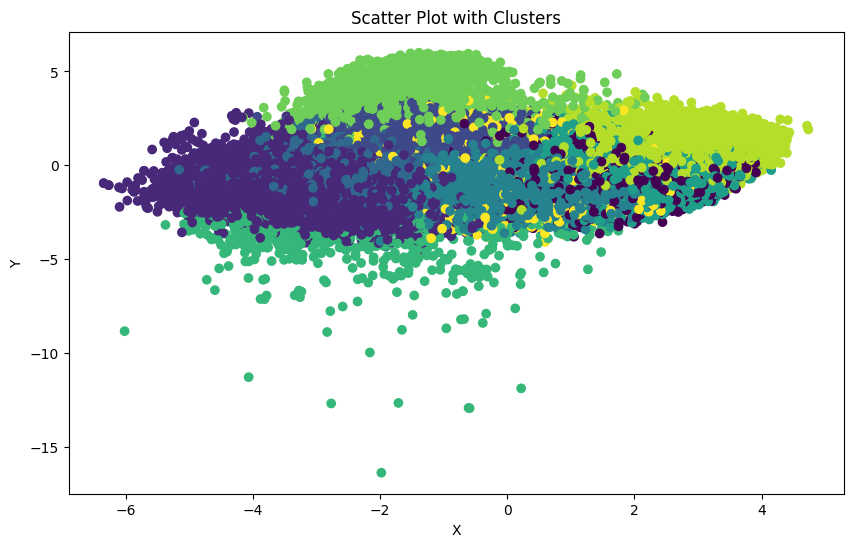

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(projection['x'], projection['y'], c=projection['cluster'], cmap='viridis')
plt.title('Scatter Plot with Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


From the plot, we observe that the clusters exhibit significant overlap.

## Evaluating the model

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df['cluster_label'])
print(f"Silhouette Score: {sil_score:3f}")

Silhouette Score: 0.135951


This Silhouette Score suggests that the clusters overlap or have less distinct boundaries.

# Build Recommendation System: 

In [15]:
def recommend_songs(favorite_song, data, num_recommendations=5):
   
     # Check if the favorite song exists
    if favorite_song not in data['name'].values:
        raise ValueError(f"'{favorite_song}' not found in the dataset.")

    # Find the cluster of the favorite song
    cluster = data.loc[data['name'] == favorite_song, 'cluster_label'].values[0]

    # Get songs in the same cluster (excluding the favorite song)
    cluster_songs = data[(data['cluster_label'] == cluster) & (data['name'] != favorite_song)]

    # Randomly sample songs from the cluster
    recommendations = cluster_songs.sample(min(num_recommendations, len(cluster_songs)))

    return recommendations[['name', 'artists']]


In [18]:
# User selects a favorite song
favorite_song = 'AYA'
recommended_songs = recommend_songs(favorite_song, df)

print("Recommended Songs:")
print(recommended_songs)

Recommended Songs:
                        name                           artists
114612  Baby Don't Cha Worry  ['Marvin Gaye', 'Tammi Terrell']
61871             Miss Mopsy                    ['Roy Haynes']
51504        Go (Radio Edit)                          ['Moby']
18453          Steal My Girl                 ['One Direction']
90145           Shake It Out          ['Manchester Orchestra']
